In [ ]:
# Importa le librerie necessarie
import pandas as pd
import gdown

# URL del file su Google Drive
url = 'https://drive.google.com/uc?id=1W1z4Q9SmwQucaksaUKMP-A5S_vmXyx1Q'

# Scarica il file utilizzando gdown
output = 'disaster_aviation_1919_2023.csv'
gdown.download(url, output, quiet=False)

# Leggi il dataset
data = pd.read_csv(output)

# Visualizza le prime righe del dataset
data.head()



Downloading...
From: https://drive.google.com/uc?id=1W1z4Q9SmwQucaksaUKMP-A5S_vmXyx1Q
To: /content/disaster_aviation_1919_2023.csv
100%|██████████| 2.09M/2.09M [00:00<00:00, 26.6MB/s]


,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown


In [ ]:
# Importa le librerie necessarie
import pandas as pd

# URL del file su Google Drive
url = 'https://drive.google.com/uc?id=1W1z4Q9SmwQucaksaUKMP-A5S_vmXyx1Q'

# Scarica il file utilizzando gdown (solo se non è già stato scaricato)
output = 'disaster_aviation_1919_2023.csv'
data = pd.read_csv(output)

# Informazioni generali sul dataset
data.info()

# Controllo dei valori nulli per ciascuna colonna
print("Valori nulli per colonna:\n", data.isnull().sum())

# Rimozione delle righe con valori nulli nelle colonne principali
data = data.dropna(subset=['date', 'fatalities', 'location', 'country'])

# Conversione del campo 'date' in formato datetime
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Conversione del campo 'fatalities' in numerico
data['fatalities'] = pd.to_numeric(data['fatalities'], errors='coerce')

# Rimozione delle righe con date non valide o valori non numerici nelle fatalities
data = data.dropna(subset=['date', 'fatalities'])

# Verifica delle modifiche
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23967 non-null  object
 1   type          23967 non-null  object
 2   registration  22419 non-null  object
 3   operator      23963 non-null  object
 4   fatalities    20029 non-null  object
 5   location      23019 non-null  object
 6   country       23967 non-null  object
 7   cat           23967 non-null  object
 8   year          23967 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB
Valori nulli per colonna:
 date               0
type               0
registration    1548
operator           4
fatalities      3938
location         948
country            0
cat                0
year               0
dtype: int64


<ipython-input-4-1fbcb1be4cd1>:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['date'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
Index: 19314 entries, 61 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          19314 non-null  datetime64[ns]
 1   type          19314 non-null  object        
 2   registration  18113 non-null  object        
 3   operator      19311 non-null  object        
 4   fatalities    19314 non-null  float64       
 5   location      19314 non-null  object        
 6   country       19314 non-null  object        
 7   cat           19314 non-null  object        
 8   year          19314 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 1.5+ MB


<ipython-input-5-9e7337fcc2de>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=incidents_by_country.values, y=incidents_by_country.index, palette='viridis')


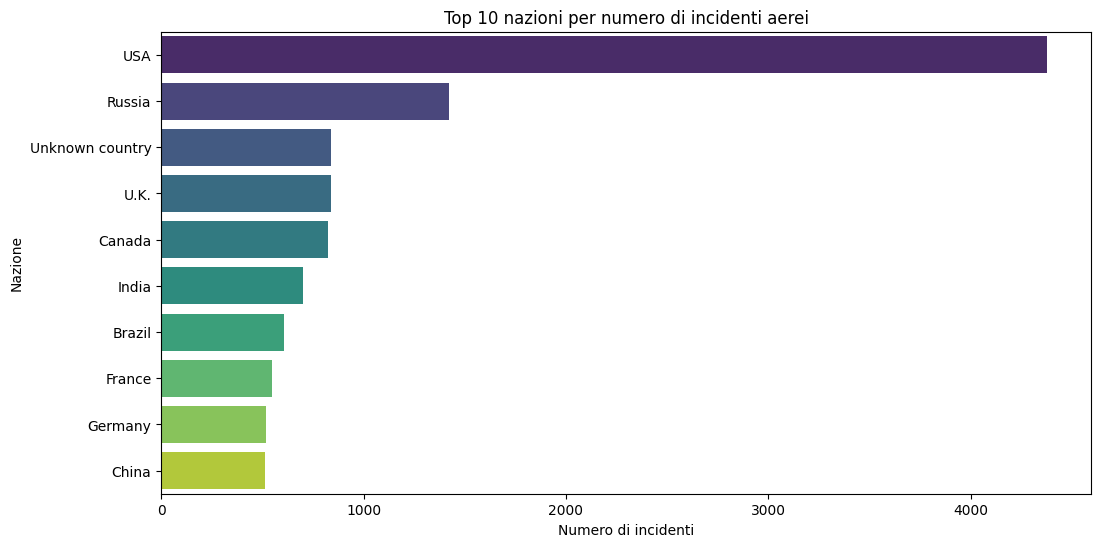

In [ ]:
# Importa le librerie necessarie
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL del file su Google Drive
url = 'https://drive.google.com/uc?id=1W1z4Q9SmwQucaksaUKMP-A5S_vmXyx1Q'

# Scarica il file utilizzando gdown (se non è già stato scaricato)
output = 'disaster_aviation_1919_2023.csv'
data = pd.read_csv(output)

# Numero di incidenti per nazione
incidents_by_country = data['country'].value_counts().head(10)

# Visualizzazione dei risultati
plt.figure(figsize=(12,6))
sns.barplot(x=incidents_by_country.values, y=incidents_by_country.index, palette='viridis')
plt.title('Top 10 nazioni per numero di incidenti aerei')
plt.xlabel('Numero di incidenti')
plt.ylabel('Nazione')
plt.show()


<ipython-input-6-5940b370e527>:14: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Figure size 1500x1000 with 0 Axes>

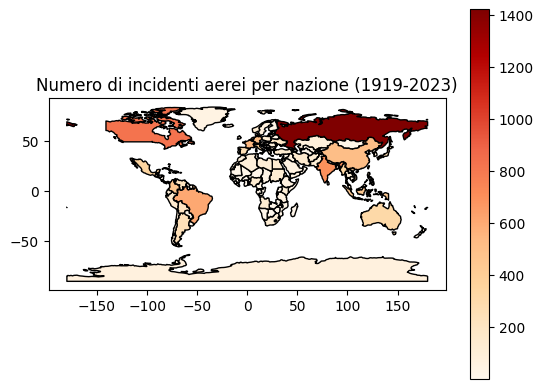

In [ ]:
# Importa le librerie necessarie
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# URL del file su Google Drive
url = 'https://drive.google.com/uc?id=1W1z4Q9SmwQucaksaUKMP-A5S_vmXyx1Q'

# Scarica il file utilizzando gdown (se non è già stato scaricato)
output = 'disaster_aviation_1919_2023.csv'
data = pd.read_csv(output)

# Caricamento della mappa mondiale
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Creazione del dataframe con il numero di incidenti per nazione
incidents_by_country = data['country'].value_counts().reset_index()
incidents_by_country.columns = ['country', 'incidents']

# Unione con la mappa
world = world.merge(incidents_by_country, how='left', left_on='name', right_on='country')

# Visualizzazione del cartogramma
plt.figure(figsize=(15,10))
world.plot(column='incidents', cmap='OrRd', legend=True, edgecolor='black')
plt.title('Numero di incidenti aerei per nazione (1919-2023)')
plt.show()


Quali decenni hanno registrato il maggior numero di incidenti aerei?

<ipython-input-7-96747ee1028a>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['year'] = pd.to_datetime(data['date'], errors='coerce').dt.year
<ipython-input-7-96747ee1028a>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=incidents_by_decade.index, y=incidents_by_decade.values, palette='magma')


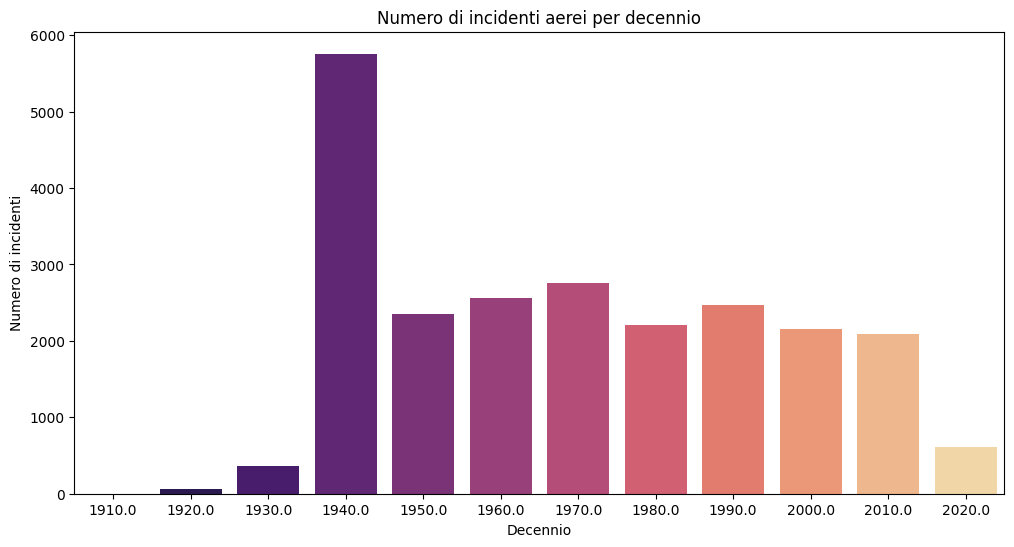

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL del file su Google Drive
url = 'https://drive.google.com/uc?id=1W1z4Q9SmwQucaksaUKMP-A5S_vmXyx1Q'

# Scarica il file utilizzando gdown (se non è già stato scaricato)
output = 'disaster_aviation_1919_2023.csv'
data = pd.read_csv(output)

# Creazione di una colonna per l'anno
data['year'] = pd.to_datetime(data['date'], errors='coerce').dt.year

# Raggruppamento per decennio
data['decade'] = (data['year'] // 10) * 10
incidents_by_decade = data['decade'].value_counts().sort_index()

# Visualizzazione dei risultati
plt.figure(figsize=(12,6))
sns.barplot(x=incidents_by_decade.index, y=incidents_by_decade.values, palette='magma')
plt.title('Numero di incidenti aerei per decennio')
plt.xlabel('Decennio')
plt.ylabel('Numero di incidenti')
plt.show()


Ci sono stati cambiamenti significativi nei tipi di velivoli coinvolti negli incidenti prima e dopo l'introduzione di nuove tecnologie o normative?

<ipython-input-9-34b1ae841cae>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['year'] = pd.to_datetime(data['date'], errors='coerce').dt.year
<ipython-input-9-34b1ae841cae>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pre_1980.values, y=pre_1980.index, palette='Blues_r')
<ipython-input-9-34b1ae841cae>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=post_1980.values, y=post_1980.index, palette='Reds_r')


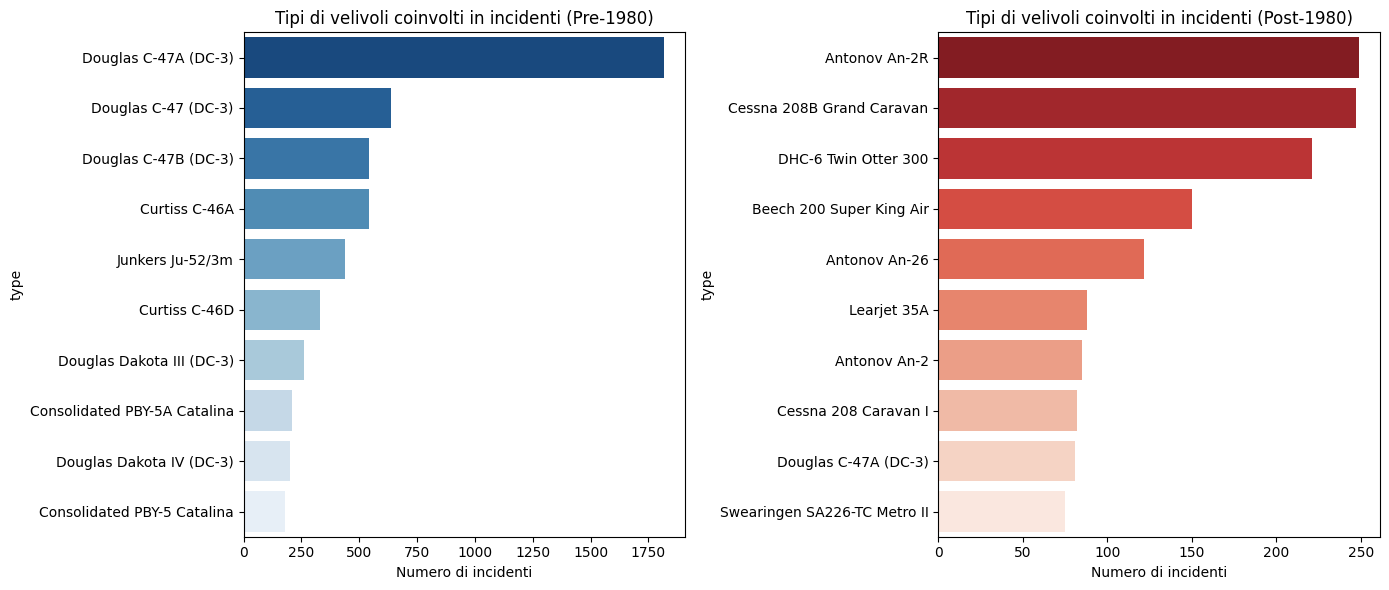

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL del file su Google Drive
url = 'https://drive.google.com/uc?id=1W1z4Q9SmwQucaksaUKMP-A5S_vmXyx1Q'

# Scarica il file utilizzando gdown (se non è già stato scaricato)
output = 'disaster_aviation_1919_2023.csv'
data = pd.read_csv(output)

# Creazione di una colonna per l'anno
data['year'] = pd.to_datetime(data['date'], errors='coerce').dt.year

# Definizione del periodo pre e post innovazioni (esempio: pre e post 1980)
pre_1980 = data[data['year'] < 1980]['type'].value_counts().head(10)
post_1980 = data[data['year'] >= 1980]['type'].value_counts().head(10)

# Visualizzazione dei risultati
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
sns.barplot(x=pre_1980.values, y=pre_1980.index, palette='Blues_r')
plt.title('Tipi di velivoli coinvolti in incidenti (Pre-1980)')
plt.xlabel('Numero di incidenti')

plt.subplot(1, 2, 2)
sns.barplot(x=post_1980.values, y=post_1980.index, palette='Reds_r')
plt.title('Tipi di velivoli coinvolti in incidenti (Post-1980)')
plt.xlabel('Numero di incidenti')

plt.tight_layout()
plt.show()


Quali sono le condizioni climatiche o stagionali più frequenti durante gli incidenti aerei?

<ipython-input-10-6be716bf7424>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['month'] = pd.to_datetime(data['date'], errors='coerce').dt.month
<ipython-input-10-6be716bf7424>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=incidents_by_month.index, y=incidents_by_month.values, palette='twilight')


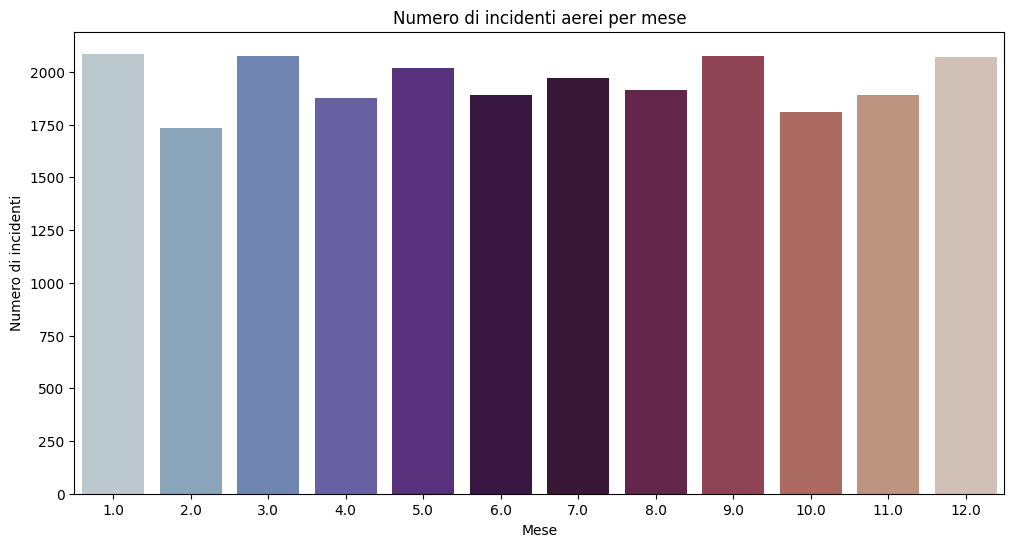

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL del file su Google Drive
url = 'https://drive.google.com/uc?id=1W1z4Q9SmwQucaksaUKMP-A5S_vmXyx1Q'

# Scarica il file utilizzando gdown (se non è già stato scaricato)
output = 'disaster_aviation_1919_2023.csv'
data = pd.read_csv(output)

# Creazione di una colonna per il mese
data['month'] = pd.to_datetime(data['date'], errors='coerce').dt.month

# Numero di incidenti per mese
incidents_by_month = data['month'].value_counts().sort_index()

# Visualizzazione dei risultati
plt.figure(figsize=(12,6))
sns.barplot(x=incidents_by_month.index, y=incidents_by_month.values, palette='twilight')
plt.title('Numero di incidenti aerei per mese')
plt.xlabel('Mese')
plt.ylabel('Numero di incidenti')
plt.show()


In quale nazione si sono verificati più incidenti?

<ipython-input-11-077da58eaf15>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=incidents_by_country.values, y=incidents_by_country.index, palette='viridis')


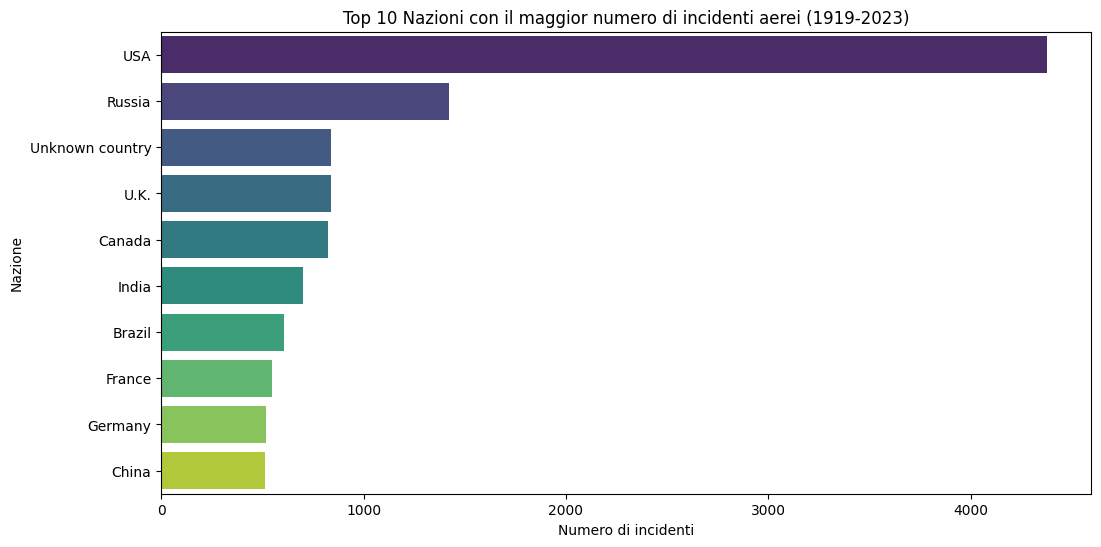

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL del file su Google Drive
url = 'https://drive.google.com/uc?id=1W1z4Q9SmwQucaksaUKMP-A5S_vmXyx1Q'

# Scarica il file utilizzando gdown (se non è già stato scaricato)
output = 'disaster_aviation_1919_2023.csv'
data = pd.read_csv(output)

# Contare il numero di incidenti per nazione
incidents_by_country = data['country'].value_counts().head(10)

# Visualizzazione dei risultati
plt.figure(figsize=(12,6))
sns.barplot(x=incidents_by_country.values, y=incidents_by_country.index, palette='viridis')
plt.title('Top 10 Nazioni con il maggior numero di incidenti aerei (1919-2023)')
plt.xlabel('Numero di incidenti')
plt.ylabel('Nazione')
plt.show()


Gli incidenti avvengono più di frequente durante determinati giorni della settimana?

<ipython-input-12-0c57205f069d>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['day_of_week'] = pd.to_datetime(data['date'], errors='coerce').dt.day_name()
<ipython-input-12-0c57205f069d>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=incidents_by_day.index, y=incidents_by_day.values, palette='plasma')


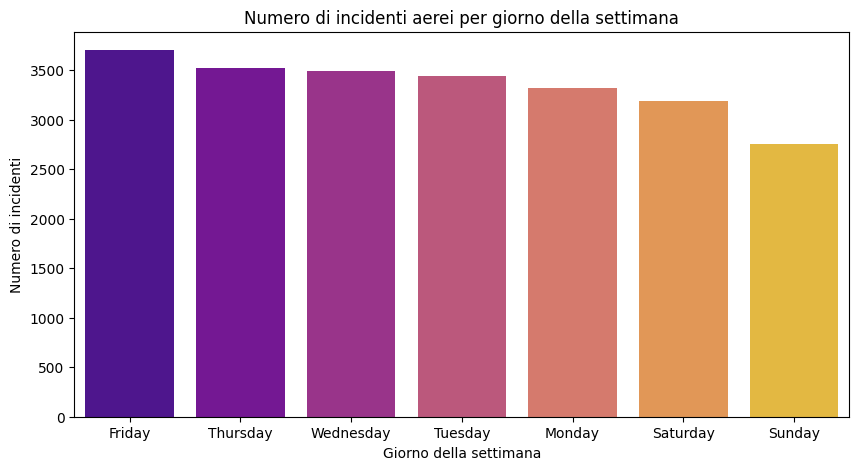

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL del file su Google Drive
url = 'https://drive.google.com/uc?id=1W1z4Q9SmwQucaksaUKMP-A5S_vmXyx1Q'

# Scarica il file utilizzando gdown (se non è già stato scaricato)
output = 'disaster_aviation_1919_2023.csv'
data = pd.read_csv(output)

# Creazione di una colonna per il giorno della settimana
data['day_of_week'] = pd.to_datetime(data['date'], errors='coerce').dt.day_name()

# Contare il numero di incidenti per giorno della settimana
incidents_by_day = data['day_of_week'].value_counts()

# Visualizzazione dei risultati
plt.figure(figsize=(10,5))
sns.barplot(x=incidents_by_day.index, y=incidents_by_day.values, palette='plasma')
plt.title('Numero di incidenti aerei per giorno della settimana')
plt.xlabel('Giorno della settimana')
plt.ylabel('Numero di incidenti')
plt.show()


Quali sono gli operatori più sicuri?

<ipython-input-14-210d60240a79>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fatal_incidents_by_operator.values, y=fatal_incidents_by_operator.index, palette='cividis')


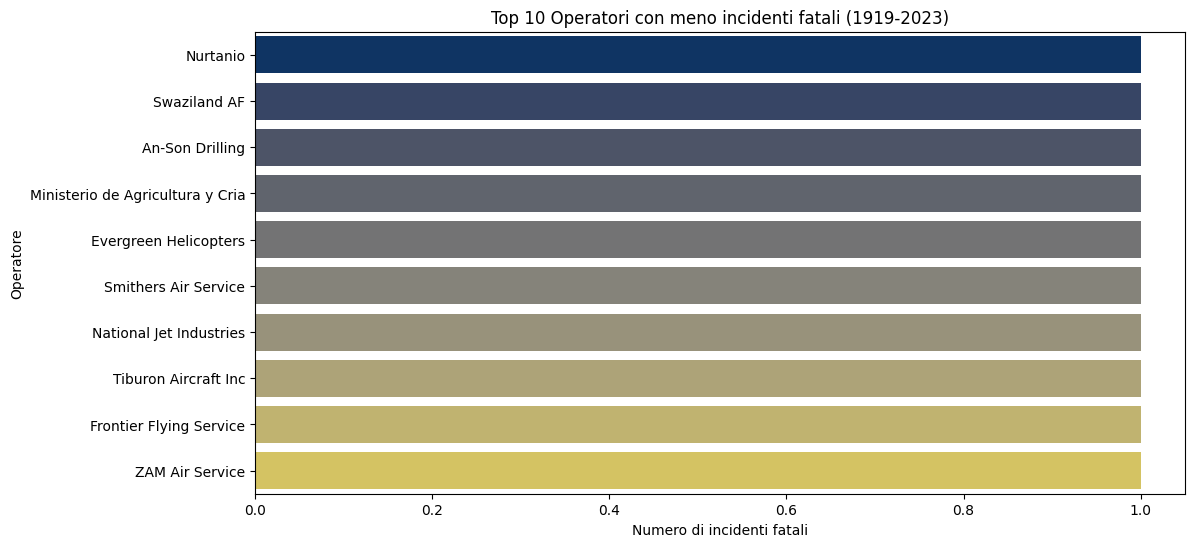

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL del file su Google Drive
url = 'https://drive.google.com/uc?id=1W1z4Q9SmwQucaksaUKMP-A5S_vmXyx1Q'

# Scarica il file utilizzando gdown (se non è già stato scaricato)
output = 'disaster_aviation_1919_2023.csv'
data = pd.read_csv(output)

# Convert 'fatalities' column to numeric, handling non-numeric values
data['fatalities'] = pd.to_numeric(data['fatalities'], errors='coerce')

# Filtrare solo gli incidenti fatali
fatal_incidents = data[data['fatalities'] > 0]

# Contare il numero di incidenti fatali per operatore
fatal_incidents_by_operator = fatal_incidents['operator'].value_counts().tail(10)

# Visualizzazione dei risultati
plt.figure(figsize=(12,6))
sns.barplot(x=fatal_incidents_by_operator.values, y=fatal_incidents_by_operator.index, palette='cividis')
plt.title('Top 10 Operatori con meno incidenti fatali (1919-2023)')
plt.xlabel('Numero di incidenti fatali')
plt.ylabel('Operatore')
plt.show()


Quale tipo di velivolo ha causato più morti?

<ipython-input-16-d14befd8f18b>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fatalities_by_type.values, y=fatalities_by_type.index, palette='inferno')


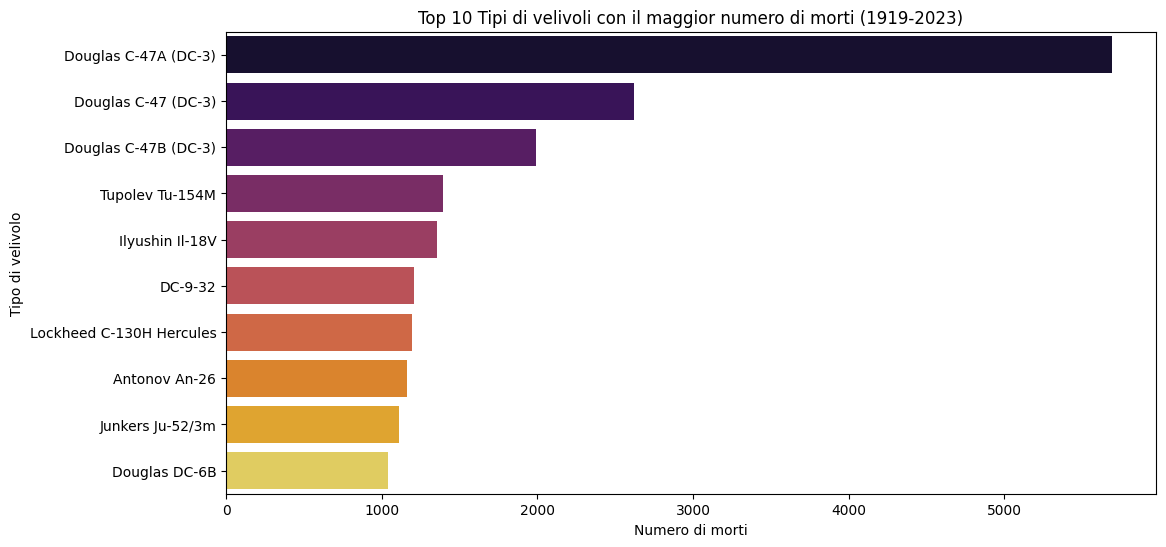

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL del file su Google Drive
url = 'https://drive.google.com/uc?id=1W1z4Q9SmwQucaksaUKMP-A5S_vmXyx1Q'

# Scarica il file utilizzando gdown (se non è già stato scaricato)
output = 'disaster_aviation_1919_2023.csv'
data = pd.read_csv(output)

# Convert 'fatalities' column to numeric, handling non-numeric values
data['fatalities'] = pd.to_numeric(data['fatalities'], errors='coerce') # Convert the 'fatalities' column to numeric type, replacing non-numeric values with NaN

# Calcolo del numero totale di morti per tipo di velivolo
fatalities_by_type = data.groupby('type')['fatalities'].sum().sort_values(ascending=False).head(10)

# Visualizzazione dei risultati
plt.figure(figsize=(12,6))
sns.barplot(x=fatalities_by_type.values, y=fatalities_by_type.index, palette='inferno')
plt.title('Top 10 Tipi di velivoli con il maggior numero di morti (1919-2023)')
plt.xlabel('Numero di morti')
plt.ylabel('Tipo di velivolo')
plt.show()


Come si sono evoluti gli incidenti dopo l'11 Settembre?

<ipython-input-17-92977cbe56f4>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['year'] = pd.to_datetime(data['date'], errors='coerce').dt.year


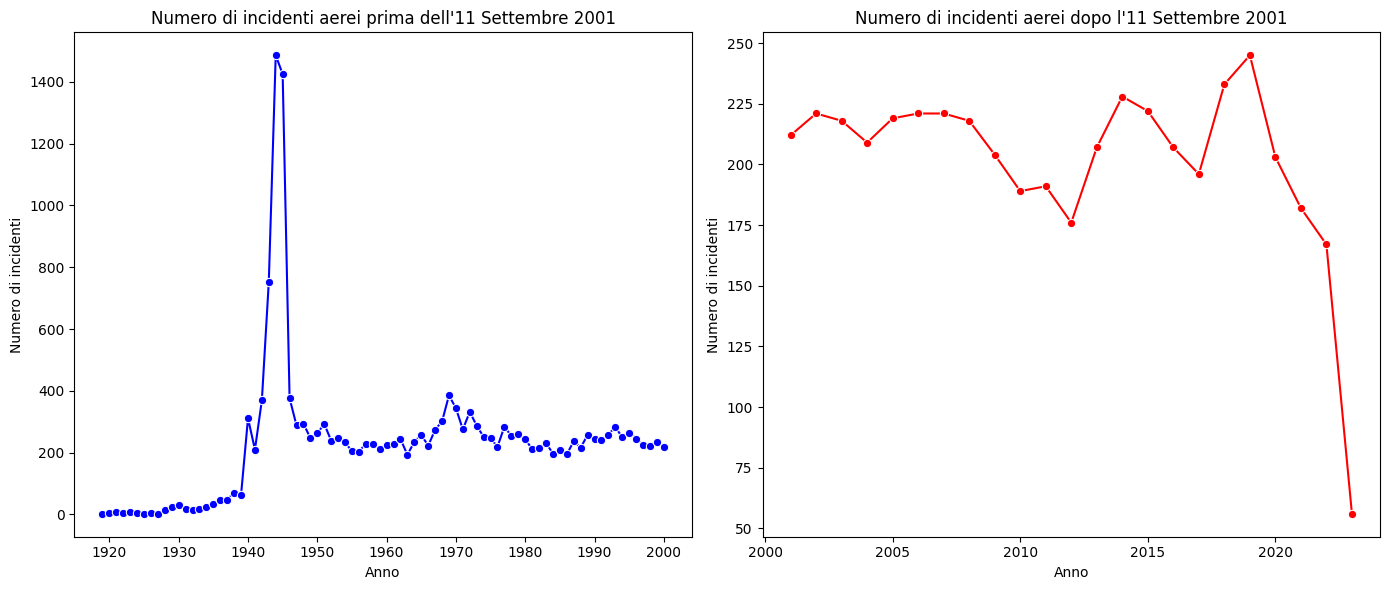

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL del file su Google Drive
url = 'https://drive.google.com/uc?id=1W1z4Q9SmwQucaksaUKMP-A5S_vmXyx1Q'

# Scarica il file utilizzando gdown (se non è già stato scaricato)
output = 'disaster_aviation_1919_2023.csv'
data = pd.read_csv(output)

# Creazione di una colonna per l'anno
data['year'] = pd.to_datetime(data['date'], errors='coerce').dt.year

# Dividere i dati in prima e dopo l'11 Settembre 2001
pre_9_11 = data[data['year'] < 2001]['year'].value_counts().sort_index()
post_9_11 = data[data['year'] >= 2001]['year'].value_counts().sort_index()

# Visualizzazione dei risultati
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
sns.lineplot(x=pre_9_11.index, y=pre_9_11.values, marker='o', color='blue')
plt.title('Numero di incidenti aerei prima dell\'11 Settembre 2001')
plt.xlabel('Anno')
plt.ylabel('Numero di incidenti')

plt.subplot(1, 2, 2)
sns.lineplot(x=post_9_11.index, y=post_9_11.values, marker='o', color='red')
plt.title('Numero di incidenti aerei dopo l\'11 Settembre 2001')
plt.xlabel('Anno')
plt.ylabel('Numero di incidenti')

plt.tight_layout()
plt.show()
